# Numpy polynomial fitting
Demonstrates simple usage of numpy.polynomial.polynomial.polyfit.

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly


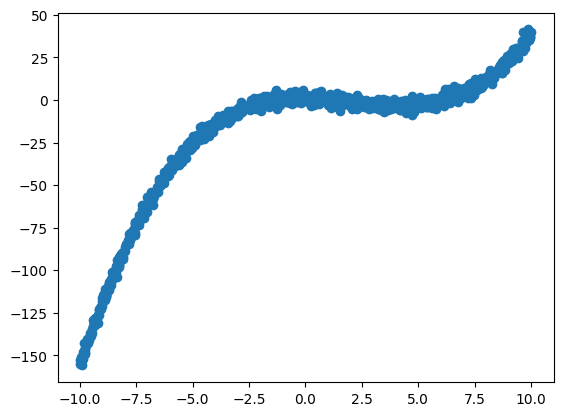

In [20]:
# Generate data

# x: random numbers from -10 to 10
x = np.random.rand(1000) * 20 - 10

# y: cubic equation with some random scatter
def add_unc(y, unc=2):
    '''
    Smear points by a gaussian
    '''
    unc = np.random.normal(y, unc)
    return unc
a0 = 1
a1 = -0.2
a2 = -0.6
a3 = 0.1
y = add_unc(a0 + a1*x + a2*x**2 + a3*x**3)

fig, ax = plt.subplots()
ax.scatter(x, y)

(array([  0.,   0.,   0.,   4.,   5.,  22.,  35., 101., 141., 178., 200.,
       156.,  96.,  38.,  14.,   8.,   2.,   0.,   0.,   0.]), array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]), <BarContainer object of 20 artists>)


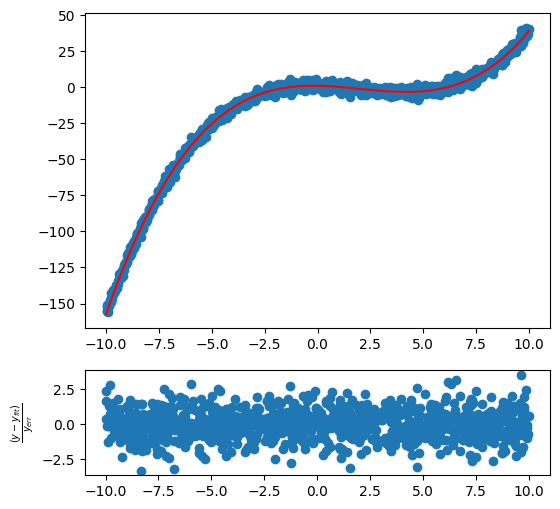

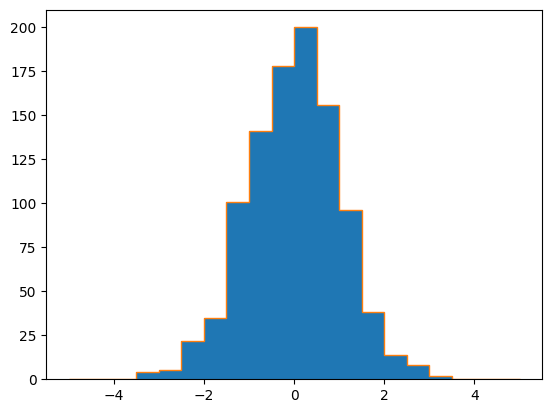

In [49]:
# Weight = 1/sigma
y_errs = np.ones_like(y) * 2.0
weights = 1. / y_errs
poly_coeffs = poly.polyfit(x, y, 3, w=weights)

fit_x = np.linspace(-10, 10, 100)
fit_y = poly.polyval(fit_x, poly_coeffs)
fig, axs = plt.subplots(2, 1, figsize=(6, 6), height_ratios=[3, 1])
axs[0].scatter(x, y)
axs[0].plot(fit_x, fit_y, color="red")

# Pulls
fit_pulls = (y - poly.polyval(x, poly_coeffs)) / y_errs
axs[1].scatter(x, fit_pulls)
axs[1].set_ylabel(r"$\frac{(y - y_{fit})}{y_{err}}$")

# Pull distribution
fig_pull, ax_pull = plt.subplots(1, 1)
bins = np.arange(-5.0, 5.5, 0.5)
pull_hist = plt.hist(fit_pulls, bins=bins)
print(pull_hist)
ax_pull.stairs(pull_hist[0], bins)